# Part A

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import randint, rand

# Overall Functions

In [220]:
# tournament selection
def selection(pop, scores, k=3):
    # randomly select k candidates
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [209]:
# one point crossover of two parents and return the two children
def crossover(p1, p2, r_cross=0.8):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # generate a random number to use as index for crossover point that is before the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

In [210]:
# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

In [211]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring i.e list, of size n_pop, of lists, of size n_bits
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    #pop = [[0]*n_bits for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    
    #create lists to graph average fitness
    avg_per_gen = []
    maxs = []
    
    # iterate over n_iter generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # append average fitness
        #print(scores)
        avg_per_gen.append(np.sum(scores)*1.0/n_pop)
        maxs.append(np.max(scores))
        # check for new best solution
        for i in range(n_pop):
            if scores[i] > best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval, avg_per_gen, maxs]

In [212]:
def plot_progression(data, avg=True, maxims=True):
    if avg:
        plt.plot(list(range(data[0])), data[1], label='Mean Fitness')
    if maxims:
        plt.plot(list(range(data[0])), data[2], label='Max Fitness')
    plt.legend()
    plt.title('Fitness Results')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

In [279]:
N_BITS = 20
N_ITER = 2000
N_POP = 500
R_CROSS =0.8
R_MUT = 0.5

# I

In [280]:
def objective(g):
    return np.sum(g)

In [281]:
#objective, n_bits, n_iter, n_pop, r_cross, r_mut
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_ITER, N_POP, R_CROSS, R_MUT)

>0, new best f([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]) = 11.000
>0, new best f([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]) = 12.000
>0, new best f([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]) = 13.000
>0, new best f([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]) = 14.000
>0, new best f([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]) = 17.000
>21, new best f([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 18.000
>131, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]) = 19.000


In [282]:
n_iter, len(avgs), len(maxs)

(2000, 2000, 2000)

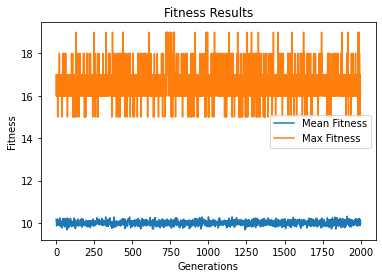

In [283]:
plot_progression([N_ITER, avgs, maxs])

# II

In [284]:
GOAL = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [285]:
def objective(gene):
    count = 0
    for i in range(len(gene)):
        if gene[i] == GOAL[i]:
            count+=1
    return count

In [286]:
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_ITER, N_POP, R_CROSS, R_MUT)

>0, new best f([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]) = 10.000
>0, new best f([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) = 11.000
>0, new best f([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]) = 12.000
>0, new best f([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]) = 13.000
>0, new best f([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]) = 14.000
>0, new best f([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]) = 15.000
>0, new best f([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]) = 16.000
>6, new best f([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]) = 17.000
>16, new best f([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]) = 18.000
>198, new best f([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]) = 19.000


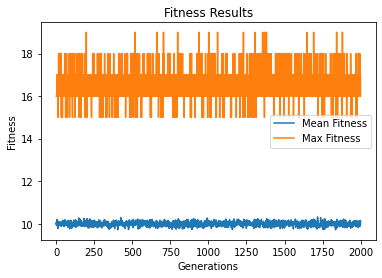

In [287]:
plot_progression([N_ITER, avgs, maxs])

# III

In [288]:
def objective(g):
    return 2*len(g) if np.sum(g)==0 else np.sum(g)

In [289]:
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_ITER, N_POP, R_CROSS, R_MUT)

>0, new best f([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]) = 11.000
>0, new best f([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]) = 12.000
>0, new best f([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]) = 14.000
>0, new best f([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]) = 15.000
>0, new best f([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]) = 17.000
>1, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]) = 18.000
>65, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]) = 19.000
>956, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000
>1154, new best f([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 40.000


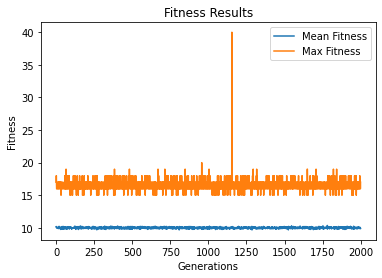

In [290]:
plot_progression([N_ITER, avgs, maxs])